# Physics 420/580 Midterm Exam 
## October 19, 2017 1pm-2pm

Do the following problems.  Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!)  Marks will be given based on how clearly you demonstrate your understanding.    

There are no restrictions on downloading from the internet, eclass,  or the use of books, notes, or any other widely available computing resources.  However, **you are not allowed** to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  

When you are finished, upload the jupyter notebook to eclass. Eclass times out after 2:05 so make sure that you upload things before then.  Also be careful to save the notebook periodically and that you upload your final exam file.


## Graphics

Plot the two curves:
$$\begin{align} y&=4x^3-3x-2\\
x&=\sin(\frac{y^4}{4}-2y^2+2)
\end{align}
$$

How many intersections are there?  Read the x,y value corresponding to the intersections from the plots.

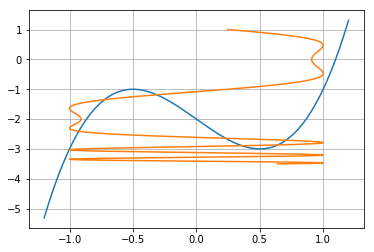

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-1.2,1.2,1000)
y=np.linspace(-3.5,1,1000)
plt.plot(x,4*x**3-3*x-2)
plt.plot(np.sin(y**4/4-2*y**2+2),y)
plt.grid()
plt.show()


There are six intersections (-.9,-2.4), (-.75,-1.3), (-.3,-1.2), (.25,-2.6), (.35,-2.8), (.65,-2.8)(.7,-2.6)

# Reconstruction

A instantaneous flash of light occurs in a large tank of water at time $t_0$ and at position $\vec{x_0}$  

The group velocity of light in water is about $2.2 \times 10^8$ m/s.  Four sensors detect the light flash, and report a measurement of the time at which light strikes the sensor.  The locations of the sensors and the time which each sensor was hit is recorded in the table below:

|Sensor #|	x|	y|	z|		Time|
|--------|------------|------------|------------|------------|
|	|[m]|	[m]|	[m]|		[s]|
|1	|0	|0|	10	|	6.3859E-08|
|2	|8.66025404|	0|	-5|		1.1032E-07|
|3	|-4.33012702|	7.5|	-5|		7.9394E-08|
|4	|-4.33012702|	-7.5|	-5|		1.0759E-07|

Calculate the initial time $t_0$ and the location of the flash.  

Here is a sketch of the general geometry.  Note that the gray region is not different from the rest of the water- it is just to show the tetrahedral arrangement of the light sensors.  The flash, shown as the yellow star is in an arbitrary location which you want to find.  
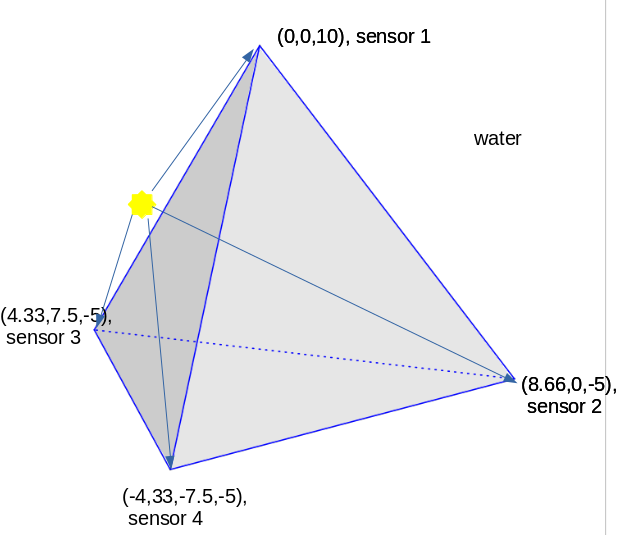


2.6368285629644522e-08 [-4.36512562  6.10654201  6.58197312] 9.98331343484 9.983313434838061


sensor1 [  0.   0.  10.] 6.38585280874e-08
[ 8.66025404  0.         -5.        ] 1.10316871818e-07
[-4.33012702  7.5        -5.        ] 7.93935118587e-08
[-4.33012702 -7.5        -5.        ] 1.07588488256e-07

The code that is used to pick a random time and position (this is not part of the solution)

In [58]:
thetaPhi=np.array([[0,0],[2/3*np.pi,0],[2/3*np.pi,2/3*np.pi],[2/3*np.pi,4/3*np.pi]])
l=10 #m, distance from centre of apparatus to light sensor
p0=np.array([l*np.sin(thetaPhi[:,0])*np.cos(thetaPhi[:,1]),
    l*np.sin(thetaPhi[:,0])*np.sin(thetaPhi[:,1]),
    l*np.cos(thetaPhi[:,0])]).transpose()
print (p0)
print(np.sqrt(3)/2)

import random
t0=random.uniform(0,30e-9)

r0=10*random.uniform(0,1)**(1/3)
ct=random.uniform(-1,1)
phi=random.uniform(0,np.pi*2)
st=np.sqrt(1-ct*ct)

xpos=np.array([st*np.cos(phi),st*np.sin(phi),ct])*r0
print(t0,xpos,np.sqrt(np.dot(xpos,xpos)),r0)

vgroup=2.2e8

for p in p0:
    print(p, np.sqrt(np.dot(p-xpos,p-xpos))/vgroup+t0)

[[  0.           0.          10.        ]
 [  8.66025404   0.          -5.        ]
 [ -4.33012702   7.5         -5.        ]
 [ -4.33012702  -7.5         -5.        ]]
0.866025403784
2.6368285629644522e-08 [-4.36512562  6.10654201  6.58197312] 9.98331343484 9.983313434838061
[  0.   0.  10.] 6.38585280874e-08
[ 8.66025404  0.         -5.        ] 1.10316871818e-07
[-4.33012702  7.5        -5.        ] 7.93935118587e-08
[-4.33012702 -7.5        -5.        ] 1.07588488256e-07


The equations we need to solve are
$$\frac{|\vec{s_i}-\vec{x_o}|}{v_g}=t-t_o$$

$$s_i^2+x_o^2+2\vec{s_i}\cdot\vec{x_o}=v_g^2\left(t^2-2tt_o+t_o^2\right)$$

# Solution for question 2

In [2]:
import numpy as np
s=np.array(([[  0.,0.,10.,6.3859E-08],[8.66025404, 0., -5.,1.1032E-07],
             [-4.33012702, 7.5, -5.,7.9394E-08],[-4.33012702,-7.5, -5.,1.0759E-07]]))

vgroup=2.2e8

#using minimizer
def fun(par):
    xo=par[0:3]
    to=par[3]
    d2=0
    for sii in s:
        si=sii[0:3]
        ti=sii[3]
        d2+=(np.sqrt(np.dot(si-xo,si-xo))-vgroup*(ti-to))**2
    return d2

import scipy.optimize
x0=np.array([0,0,0,0])
sol=scipy.optimize.minimize(fun,x0,method='Powell')

# or using solver
def fun2(par):
    xo=par[0:3]
    to=par[3]
    d2=[]
    for sii in s:
        si=sii[0:3]
        ti=sii[3]
        d2.append(np.sqrt(np.dot(si-xo,si-xo))-vgroup*(ti-to))
    return np.array(d2)
    
    
print(s.shape)
sol2=scipy.optimize.fsolve(fun2,x0)
print('Solution from minimizer:',sol.x)
print('Solution from fsolve:',sol2, 'Check the solutions:',fun2(sol2))

(4, 4)
Solution from minimizer: [ -4.36595483e+00   6.10704000e+00   6.58259003e+00   2.63662486e-08]
Solution from fsolve: [ -4.36595483e+00   6.10704000e+00   6.58259003e+00   2.63662486e-08] Check the solutions: [  3.76410014e-12  -1.25918831e-10  -1.64845915e-12   1.37077905e-10]


## Trajectories

An alpha-particle is a helium nucleus, with mass 6.644×10−27 kg or 4.002 u, and charge equal to twice the charge of an electron (but positive).  Calculate the trajectory of a 5MeV=(5*1.609 e-13 J) alpha particle as it moves by a gold nucleus (mass 196.966 u), with charge 79e, as a function of  the impact parameter b, below.  Assume both the alpha and the gold are point particles, and ignore special relativity.  Plot the scattering angle $\theta$ and energy loss of the alpha as a function of $b$, for values of b between 1e-16 and 1e-9m.  

The force between two charge particles is given by the Coulomb potential:
$$\vec{F}=\frac{1}{4\pi\epsilon_0}\frac{q_1q_2 (\vec{r_2}-\vec{r_1})}{|\vec{r_2}-\vec{r_1}|^3}$$ with $\epsilon_0=8.85\times10^{-12}\frac{\rm{C}^2}{\rm{N\cdot m^2}}$


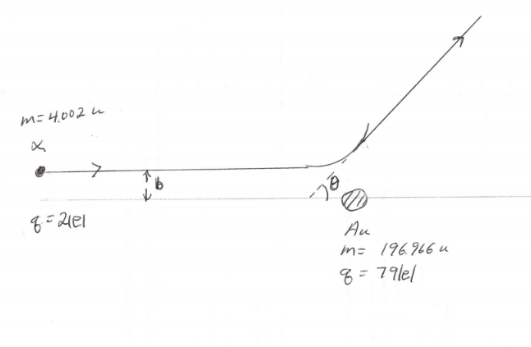



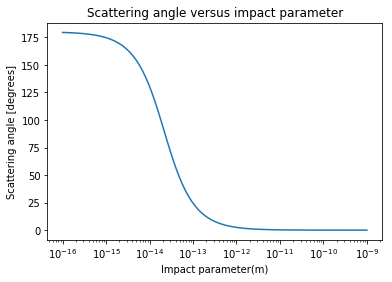

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
q1=2*1.6e-19 # Coulombs, alpha
q2=79*1.6e-19 # coulombs, gold
k=1/(4*np.pi*8.85e-12)*q1*q2
mHe=6.644e-27
mAu=196.966/4.002*mHe
factor=(mAu+mHe)/mAu  # to transform x to gold-He distance
def traj(x,t):
    x0=factor*x[0:3]
    v0=x[3:6]
    distance=np.sqrt(np.dot(x0,x0))
    acceleration=k*x0/distance**3/mHe
    return np.array((v0,acceleration)).reshape(6)

E0=5*1.609e-13 #J
velocity=np.sqrt(2*E0/mHe)
init=np.array([-1.e-8,1e-14,0,velocity,0,0])
t0=np.linspace(0,-2*init[0]/velocity,500)
sol0=odeint(traj,init,t0)

blist=np.logspace(-16,-9,100)
sa=[]
for b in blist:
    init[1]=b
    sol=odeint(traj,init,t0,rtol=1e-6)
    angle=np.arctan2(sol[-1,4],sol[-1,3])*180/np.pi
    sa.append(angle)
    
plt.figure()
plt.title('Scattering angle versus impact parameter')
plt.ylabel('Scattering angle [degrees]')
plt.xlabel('Impact parameter(m)')
plt.semilogx(blist,sa)
plt.show()


# Don't forget to upload your work to eclass!